## 1. 导入需要的模块和库

In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 2. 导入数据，探索数据

In [3]:
data = pd.read_csv("digit recognizor.csv")
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = data.iloc[:,1:]
y = data.label

x.shape

(42000, 784)

## 3. 画累计方差贡献率曲线，找最佳降维后维度的范围

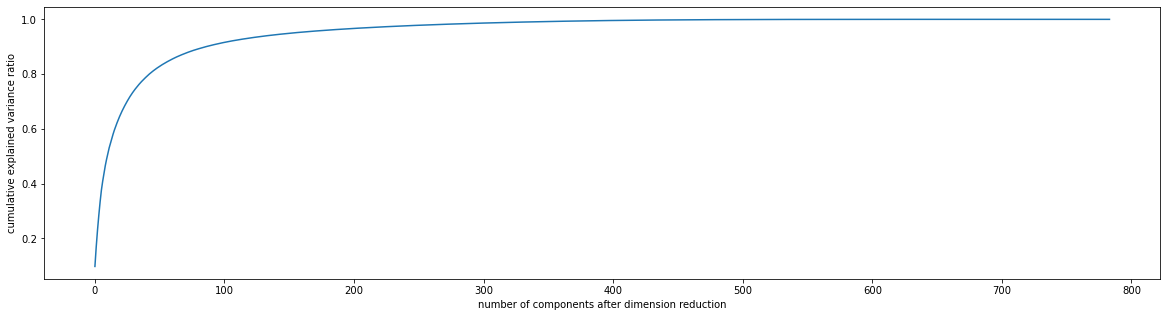

In [5]:
pca_line = PCA().fit(x)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

## 4. 降维后维度的学习曲线，继续缩小最佳维度的范围

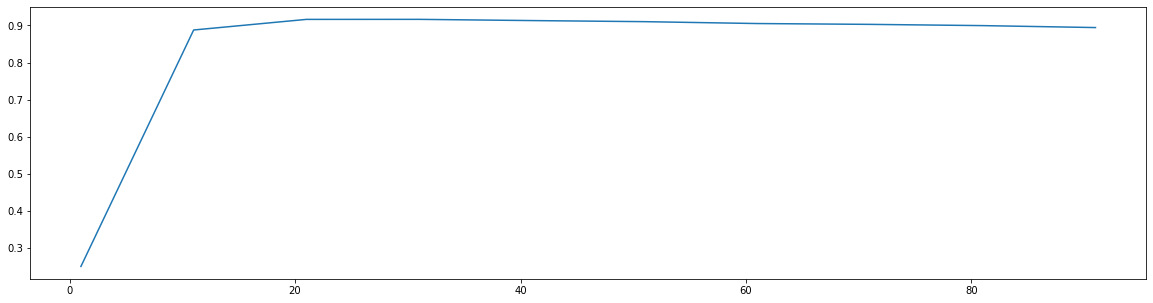

In [7]:
score = []
for i in range(1,101,10):
    x_dr = PCA(i).fit_transform(x)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),x_dr,y,cv=5).mean()
    score.append(once)
    
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

## 5. 细化学习曲线，找出降维后的最佳维度

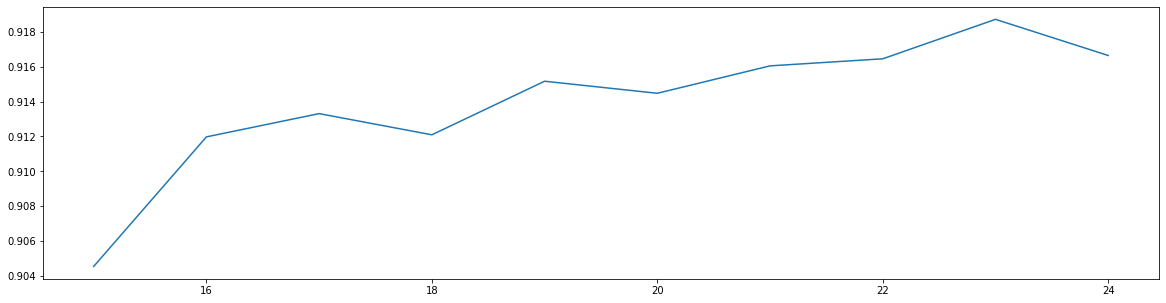

In [10]:
score = []
for i in range(15,25):
    x_dr = PCA(i).fit_transform(x)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),x_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(15,25),score)
plt.show()

## 6. 导入找出的最佳维度进行降维，查看模型效果

In [11]:
x_dr = PCA(23).fit_transform(x)
cross_val_score(RFC(n_estimators=100,random_state=0),x_dr,y,cv=5).mean()

0.9463809523809523

## 7.KNN建模如何？

In [13]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),x_dr,y,cv=5).mean()

0.9699285714285713

## 8.KNN的k值学习曲线

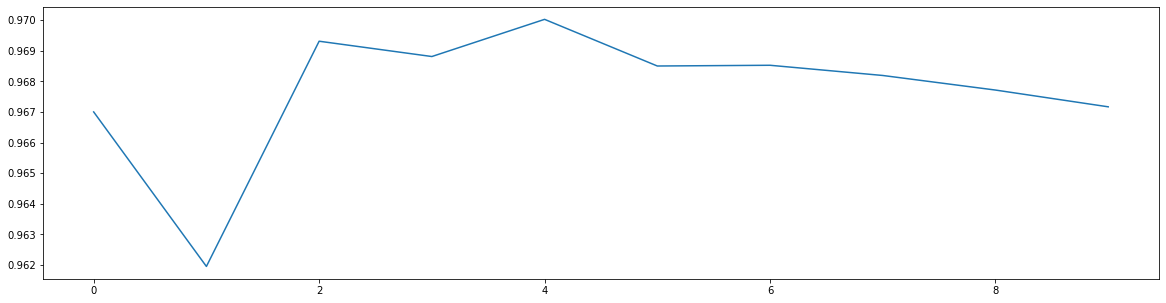

In [14]:
score = []
for i in range(10):
    x_dr = PCA(23).fit_transform(x)
    once = cross_val_score(KNN(i+1),x_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()

In [16]:
cross_val_score(KNN(4),x_dr,y,cv=5).mean()

0.9688571428571429